In [1]:
import pandas as pd
pd.options.display.max_columns = 100
all_muts_df = pd.read_pickle("./data/4_7_df.pkl")
all_muts_df.shape

(1278, 41)

In [2]:
all_muts_df.columns

Index(['index', 'Details', 'mutation target annotation', 'Mutation Type',
       'Position', 'Reference Seq', 'Sequence Change', 'ale', 'exp', 'flask',
       'isolate', 'presence', 'tech_rep', 'coding', 'range',
       'gene RegulonDB ID', 'genetic features', 'oriC', 'pseudogene', 'TFBS',
       'promoter', 'RBS', 'attenuator terminator', 'terminator', 'genetic',
       'genomic features', 'genetic feature links', 'operons', 'operon links',
       'regulators', 'regulator links', 'temperature', 'carbon-source',
       'supplement', 'strain-description', 'taxonomy-id', 'base-media',
       'nitrogen-source', 'phosphorous-source', 'sulfur-source',
       'calcium-source'],
      dtype='object')

In [3]:
all_muts_df["exp AFIR"] = all_muts_df.apply(lambda r:str(r.exp) + " " + str(r.ale) + " " + str(r.flask) + " " + str(r.isolate) + " " + str(r.tech_rep), axis=1)
all_muts_df["exp ALEs"] = all_muts_df.apply(lambda r:str(r.exp) + " " + str(r.ale), axis=1)

In [4]:
global_cnt_d = dict()
global_cnt_d["mutations"] = len(all_muts_df)
global_cnt_d["experiments"] = len(all_muts_df.exp.unique())
global_cnt_d["endpoint samples"] = len(all_muts_df["exp AFIR"].unique())
global_cnt_d["ALEs"] = len(all_muts_df["exp ALEs"].unique())
global_cnt_d

{'mutations': 1278, 'experiments': 18, 'endpoint samples': 238, 'ALEs': 121}

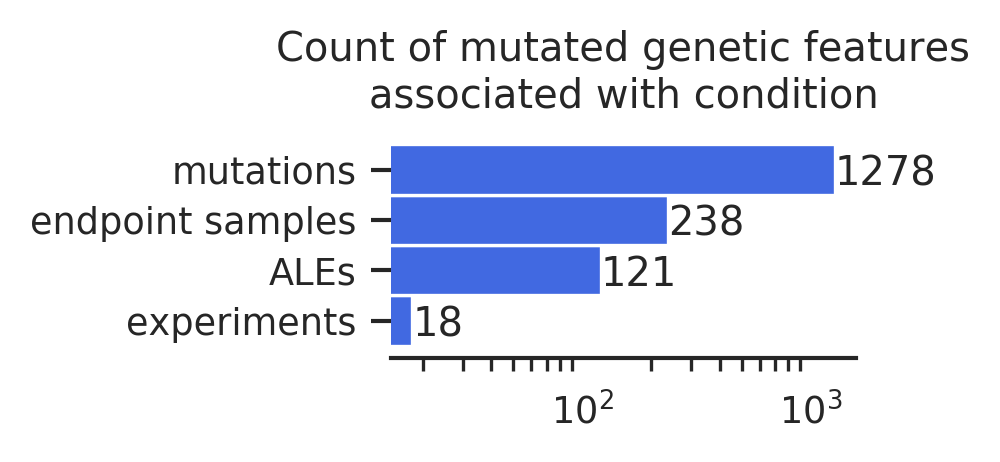

In [5]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("ticks")

pdf = pd.DataFrame.from_dict(data=global_cnt_d, orient="index", columns=["count"])
pdf = pdf.sort_values("count")
ax = pdf.plot.barh(
#     y="proportion",
#     x="feature",
    color="#4169e1",
    figsize=(2,1),
    width=1
)

ax.get_legend().remove()
sns.despine(ax=ax,
            top=True,
            right=True, 
#             bottom=True,
            left=True
           )
ax.set_title("Count of mutated genetic features\nassociated with condition")

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=False,      # ticks along the bottom edge are off
#     labelbottom=False  # labels along the bottom edge are off
)

ax.set_xscale('log')

for i, r in pdf.reset_index().iterrows():
#     print(r)
    s = str(r["count"])
    ax.text(r["count"], i-0.3,  s)

In [6]:
cdf = pd.DataFrame(columns=["experiment", "mutations", "endpoint samples", "ALEs"])
for exp, exp_mut_df in all_muts_df.groupby(["exp"]):
    df = pd.DataFrame(
        [[exp,
          len(exp_mut_df),
          len(exp_mut_df["exp AFIR"].unique()),
          len(exp_mut_df["exp ALEs"].unique()),
         ]],
        columns=["experiment", "mutations", "endpoint samples", "ALEs"]
    )
    cdf = cdf.append(df, ignore_index=True)
cdf

,experiment,mutations,endpoint samples,ALEs
0,42C,204,10,10
1,C13,36,6,6
2,Central_carbon_knockout_PTS,31,8,5
3,Central_carbon_knockout_glucose_evolution,13,5,2
4,Central_carbon_knockout_gnd,22,8,4
5,Central_carbon_knockout_pgi,102,30,17
6,Central_carbon_knockout_sdh,19,10,4
7,Central_carbon_knockout_tpiA,51,10,5
8,GLU,152,16,6
9,GYD,163,53,32


In [50]:
cdf.to_csv("./data_size.csv")